C:\Users\Admin\AppData\Local\Temp\ipykernel_6612\2416786034.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(r'C:\Users\Admin\Desktop\Research\EGG\STEW Dataset\sub06_hi.txt', delim_whitespace=True, header=None)


        0        1        2        3        4        5        6        7   \
0  4438.97  3995.38  4550.26  3986.67  4703.08  4321.54  4298.97  3974.87   
1  4429.74  3975.38  4545.13  3971.28  4693.33  4314.36  4293.85  3971.79   
2  4424.10  3971.79  4538.97  3930.26  4694.36  4315.90  4293.85  3973.33   
3  4429.23  3992.31  4536.41  3929.74  4704.62  4318.97  4301.54  3975.38   
4  4440.51  3995.38  4545.64  3957.95  4706.15  4317.44  4310.26  3984.10   

        8        9        10       11       12       13  
0  3663.08  4151.79  4220.51  4231.79  4228.72  4304.10  
1  3663.59  4154.87  4212.31  4234.87  4222.05  4297.95  
2  3664.62  4167.69  4204.10  4234.36  4226.15  4292.82  
3  3665.13  4180.00  4211.28  4229.23  4235.38  4297.95  
4  3672.82  4194.87  4218.46  4236.92  4235.38  4308.21  
(19200, 14)
                 0             1            2             3             4   \
count  19200.000000  19200.000000  19200.00000  19200.000000  19200.000000   
mean    4454.850003  

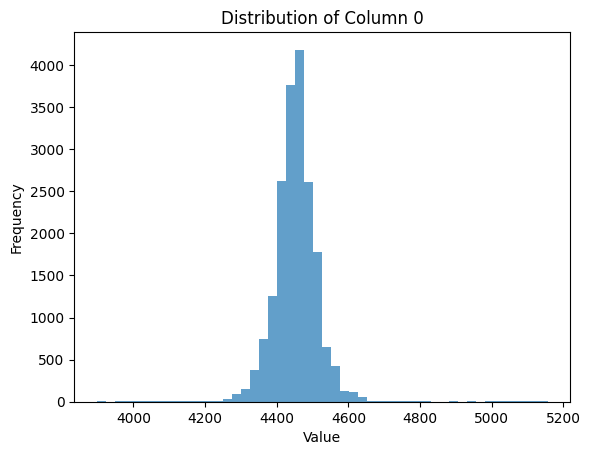

In [8]:
import pandas as pd

# Read the space-separated text file into a pandas DataFrame
df = pd.read_csv(r'C:\Users\Admin\Desktop\Research\EGG\STEW Dataset\sub06_hi.txt', delim_whitespace=True, header=None)

# Display the first few rows to inspect the data
print(df.head())

# Get the shape (rows and columns) of the dataset
print(df.shape)

# Display summary statistics of the dataset
print(df.describe())

import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Example: Plotting the distribution of the first column
df[0].plot(kind='hist', bins=50, alpha=0.7)
plt.title('Distribution of Column 0')
plt.xlabel('Value')
plt.show()



In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your data (adjust the path as needed)
df = pd.read_csv(r'C:\Users\Admin\Desktop\Research\EGG\STEW Dataset\sub06_hi.txt', delim_whitespace=True, header=None)

# Initialize the scaler
scaler = StandardScaler()

# Apply normalization to all columns
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Show the normalized data
print(df_normalized.head())



         0         1         2         3         4         5         6   \
0 -0.232818  0.324821  0.454697  0.363471 -0.030892 -0.387487 -0.054808   
1 -0.368140 -0.129229  0.229291  0.034446 -0.568623 -0.746836 -0.250687   
2 -0.450828 -0.210731 -0.041372 -0.842526 -0.511816 -0.669761 -0.250687   
3 -0.375617  0.255125 -0.153856 -0.853643  0.054042 -0.516112  0.043514   
4 -0.210240  0.324821  0.251700 -0.250537  0.138424 -0.592686  0.377121   

         7         8         9         10        11        12        13  
0  0.148414  0.952857 -1.104980  0.286276  1.287386 -0.223387  0.528791  
1 -0.020029  0.971614 -0.995776  0.159832  1.392521 -0.315520  0.371728  
2  0.064193  1.009494 -0.541232  0.033234  1.375112 -0.258887  0.240715  
3  0.176306  1.028251 -0.104771  0.143950  1.200001 -0.131393  0.371728  
4  0.653196  1.311070  0.422457  0.254665  1.462497 -0.131393  0.633754  


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\1616808982.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(r'C:\Users\Admin\Desktop\Research\EGG\STEW Dataset\sub06_hi.txt', delim_whitespace=True, header=None)


In [11]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Set the folder paths
input_folder_path = r'C:\Users\Admin\Desktop\Research\EGG\STEW Dataset'
output_folder_path = r'C:\Users\Admin\Desktop\Research\EGG\Normalized_Data'

# Ensure the output folder exists, if not, create it
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Get all TXT file names in the folder
files = [f for f in os.listdir(input_folder_path) if f.endswith('.txt')]

# Debugging: Print the list of files
print(f"Files found in the folder: {files}")

# If no TXT files are found, print a message
if not files:
    print("No TXT files found in the folder.")
else:
    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Loop through each file
    for file in files:
        # Construct the file path
        file_path = os.path.join(input_folder_path, file)
        
        # Read the file (adjusting separator if needed)
        df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed
        
        # Check if the dataframe contains only numeric values
        if not df.apply(pd.to_numeric, errors='coerce').notna().all().all():
            print(f"Skipping file {file} due to non-numeric data.")
            continue
        
        # Normalize the data
        df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
        
        # Save the normalized data in the output folder as a CSV
        normalized_file_path = os.path.join(output_folder_path, f"normalized_{file.replace('.txt', '.csv')}")
        df_normalized.to_csv(normalized_file_path, index=False)
        
        print(f"Normalized file saved: {normalized_file_path}")


Files found in the folder: ['ratings.txt', 'sub01_hi.txt', 'sub01_lo.txt', 'sub02_hi.txt', 'sub02_lo.txt', 'sub03_hi.txt', 'sub03_lo.txt', 'sub04_hi.txt', 'sub04_lo.txt', 'sub05_hi.txt', 'sub05_lo.txt', 'sub06_hi.txt', 'sub06_lo.txt', 'sub07_hi.txt', 'sub07_lo.txt', 'sub08_hi.txt', 'sub08_lo.txt', 'sub09_hi.txt', 'sub09_lo.txt', 'sub10_hi.txt', 'sub10_lo.txt', 'sub11_hi.txt', 'sub11_lo.txt', 'sub12_hi.txt', 'sub12_lo.txt', 'sub13_hi.txt', 'sub13_lo.txt', 'sub14_hi.txt', 'sub14_lo.txt', 'sub15_hi.txt', 'sub15_lo.txt', 'sub16_hi.txt', 'sub16_lo.txt', 'sub17_hi.txt', 'sub17_lo.txt', 'sub18_hi.txt', 'sub18_lo.txt', 'sub19_hi.txt', 'sub19_lo.txt', 'sub20_hi.txt', 'sub20_lo.txt', 'sub21_hi.txt', 'sub21_lo.txt', 'sub22_hi.txt', 'sub22_lo.txt', 'sub23_hi.txt', 'sub23_lo.txt', 'sub24_hi.txt', 'sub24_lo.txt', 'sub25_hi.txt', 'sub25_lo.txt', 'sub26_hi.txt', 'sub26_lo.txt', 'sub27_hi.txt', 'sub27_lo.txt', 'sub28_hi.txt', 'sub28_lo.txt', 'sub29_hi.txt', 'sub29_lo.txt', 'sub30_hi.txt', 'sub30_lo.txt

C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed
C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub01_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub01_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub02_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub02_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub03_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub03_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub04_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub04_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub05_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub05_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub06_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub06_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub07_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub07_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub08_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub08_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub09_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub09_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub10_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub10_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub11_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub11_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub12_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub12_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub13_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub13_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub14_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub14_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub15_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub15_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub16_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub16_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub17_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub17_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub18_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub18_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub19_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub19_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub20_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub20_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub21_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub21_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub22_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub22_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub23_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub23_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub24_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub24_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub25_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub25_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub26_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub26_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub27_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub27_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub28_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub28_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub29_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub29_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub30_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub30_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub31_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub31_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub32_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub32_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub33_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub33_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub34_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub34_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub35_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub35_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub36_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub36_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub37_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub37_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub38_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub38_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub39_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub39_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub40_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub40_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub41_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub41_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub42_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub42_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub43_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub43_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub44_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub44_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub45_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub45_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub46_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub46_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub47_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub47_lo.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub48_hi.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\2045240408.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # Adjust delimiter if needed


Normalized file saved: C:\Users\Admin\Desktop\Research\EGG\Normalized_Data\normalized_sub48_lo.csv


In [16]:
from sklearn.model_selection import train_test_split

# Example: Assuming `df_normalized` is your data
X = df_normalized.iloc[:, :-1]  # Select all columns except the last one (features)
y = df_normalized.iloc[:, -1]   # Select the last column (target)


# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)



Shape of X (features): (19200, 13)
Shape of y (target): (19200,)


In [17]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (15360, 13)
Shape of X_test: (3840, 13)
Shape of y_train: (15360,)
Shape of y_test: (3840,)


In [18]:
from scipy.signal import butter, filtfilt

def bandpass_filter(data, low_cutoff, high_cutoff, fs, order=4):
    nyquist = 0.5 * fs
    low = low_cutoff / nyquist
    high = high_cutoff / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=0)

# Example of bandpass filtering for 7-32 Hz
fs = 256  # Assuming your EEG data has a sampling frequency of 256 Hz
data_filtered_7_32 = bandpass_filter(X_train, 7, 32, fs)
data_filtered_7_40 = bandpass_filter(X_train, 7, 40, fs)


In [21]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=10)  # You can adjust the number of components
X_train_ica = ica.fit_transform(X_train)  # Apply ICA on training data
X_test_ica = ica.transform(X_test)  # Apply ICA on testing data

# You can remove specific components by setting them to 0
X_train_ica[:, 0] = 0  # Remove the first component (for example, noise component)
X_test_ica[:, 0] = 0  # Remove the same component from the test set


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
import numpy as np

# Check the shape and first few values of y_train
print(y_train.shape)  # It should output something like (n_samples,)
print(y_train.head())  # Check the first few entries to make sure they are numerical

# Train a Random Forest Regressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Use feature importance to select the most relevant channels
selector = SelectFromModel(regressor, threshold="mean")
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Optionally, check the number of features selected
print("Number of features selected:", X_train_selected.shape[1])



(15360,)
12477    1.299311
3781     0.463060
30      -0.694228
1604    -0.168963
10027   -1.209631
Name: 13, dtype: float64
Number of features selected: 3


In [32]:
import numpy as np
from sklearn.decomposition import FastICA

# Apply ICA or other preprocessing
ica = FastICA(n_components=5, random_state=0)
X_train_reconstructed = ica.fit_transform(X_train)  # Reconstruct the signal
X_test_reconstructed = ica.transform(X_test)  # Reconstruct the signal for test set

# Signal-to-Noise Ratio (SNR)
def snr(signal, noise):
    signal_power = np.mean(signal**2)
    noise_power = np.mean(noise**2)
    return 10 * np.log10(signal_power / noise_power)

# Peak Signal-to-Noise Ratio (PSNR)
def psnr(original, processed):
    # Ensure the data are numpy arrays for compatibility
    original = np.asarray(original)
    processed = np.asarray(processed)

    # Check if both arrays have the same shape
    min_len = min(original.shape[1], processed.shape[1])  # Adjust to the minimum dimension length
    original = original[:, :min_len]
    processed = processed[:, :min_len]
    
    # Compute Mean Squared Error (MSE)
    mse = np.mean((original - processed) ** 2)
    if mse == 0:
        return 100  # Perfect match
    max_pixel = np.max(original)  # Assuming the max pixel value is the same for both
    return 20 * np.log10(max_pixel / np.sqrt(mse))

# Calculate PSNR for training set (Before Preprocessing)
psnr_train_before = psnr(X_train, X_train_reconstructed)
psnr_test_before = psnr(X_test, X_test_reconstructed)

# Calculate PSNR for training set (After Preprocessing)
psnr_train_after = psnr(X_train_reconstructed, X_train_reconstructed)  # Compare reconstructed with reconstructed
psnr_test_after = psnr(X_test_reconstructed, X_test_reconstructed)  # Compare reconstructed with reconstructed

# Print PSNR values
print("PSNR (Train) Before Preprocessing:", psnr_train_before)
print("PSNR (Test) Before Preprocessing:", psnr_test_before)
print("PSNR (Train) After Preprocessing:", psnr_train_after)
print("PSNR (Test) After Preprocessing:", psnr_test_after)


PSNR (Train) Before Preprocessing: 10.130836246410853
PSNR (Test) Before Preprocessing: 9.864383030970622
PSNR (Train) After Preprocessing: 100
PSNR (Test) After Preprocessing: 100


In [37]:
# Convert continuous targets to discrete labels (e.g., binning into 3 categories)
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

# Ensure y_train and y_test are numpy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Reshape and discretize
k_bins = 3
encoder = KBinsDiscretizer(n_bins=k_bins, encode='ordinal', strategy='uniform')
y_train_discrete = encoder.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_discrete = encoder.transform(y_test.reshape(-1, 1)).ravel()

# Continue with model training
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train_filtered, y_train_discrete)

# Test the model
accuracy = clf.score(X_test_filtered, y_test_discrete)
print("Model Accuracy (Filtered Data):", accuracy)


Model Accuracy (Filtered Data): 0.8747395833333333


In [38]:
from sklearn.svm import SVC
clf = SVC(random_state=0)
clf.fit(X_train_filtered, y_train_discrete)
accuracy = clf.score(X_test_filtered, y_test_discrete)
print("Model Accuracy with SVM:", accuracy)


Model Accuracy with SVM: 0.8768229166666667


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=3)
grid_search.fit(X_train_filtered, y_train_discrete)
print("Best Params:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.8743489583333334


In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train_filtered, y_train_discrete, cv=5)
print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.8734375


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
clf = RandomForestClassifier(random_state=0)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train_discrete)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Use the best estimator for testing
best_clf = grid_search.best_estimator_
test_accuracy = best_clf.score(X_test, y_test_discrete)
print("Test Accuracy with Best Parameters:", test_accuracy)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8744140625
Test Accuracy with Best Parameters: 0.87734375


In [42]:
from sklearn.svm import SVC

# Initialize SVM
svm_clf = SVC(kernel='rbf', random_state=0)

# Train the SVM model
svm_clf.fit(X_train, y_train_discrete)

# Test Accuracy
svm_accuracy = svm_clf.score(X_test, y_test_discrete)
print("SVM Test Accuracy:", svm_accuracy)


SVM Test Accuracy: 0.8770833333333333


In [44]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=0)

# Train the model
gb_clf.fit(X_train, y_train_discrete)

# Test Accuracy
gb_accuracy = gb_clf.score(X_test, y_test_discrete)
print("Gradient Boosting Test Accuracy:", gb_accuracy)


Gradient Boosting Test Accuracy: 0.8721354166666667


In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_clf.fit(X_train, y_train_discrete)

# Test Accuracy
knn_accuracy = knn_clf.score(X_test, y_test_discrete)
print("KNN Test Accuracy:", knn_accuracy)


KNN Test Accuracy: 0.8643229166666667


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearch
grid_search_svm = GridSearchCV(SVC(random_state=0), param_grid, cv=5, scoring='accuracy')

# Perform GridSearch
grid_search_svm.fit(X_train, y_train_discrete)

# Best parameters and accuracy
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_svm.best_score_)

# Test the model with best parameters
best_svm = grid_search_svm.best_estimator_
svm_test_accuracy = best_svm.score(X_test, y_test_discrete)
print("Test Accuracy with Best SVM Parameters:", svm_test_accuracy)


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

# Example dataset loading (adjust this based on your actual dataset)
# Assuming `data` is your full dataset and `labels` are the targets
data = np.random.rand(10000, 13)  # Replace with your actual dataset
labels = np.random.rand(10000)    # Replace with your actual target values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

# Convert continuous targets to discrete labels
encoder = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_train_discrete = encoder.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_discrete = encoder.transform(y_test.reshape(-1, 1)).ravel()


In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define a smaller parameter grid to save time
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

# Initialize GridSearch with 3-fold cross-validation
grid_search_svm = GridSearchCV(SVC(random_state=0), param_grid, cv=3, scoring='accuracy')

# Perform GridSearch
grid_search_svm.fit(X_train, y_train_discrete)

# Best parameters and accuracy
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_svm.best_score_)

# Test the model with best parameters
best_svm = grid_search_svm.best_estimator_
svm_test_accuracy = best_svm.score(X_test, y_test_discrete)
print("Test Accuracy with Best SVM Parameters:", svm_test_accuracy)


Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.3418747450267141
Test Accuracy with Best SVM Parameters: 0.336


In [4]:
# Print column names of the dataset to find the correct target column
data = pd.read_csv(file_path)
print(data.columns)


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13'],
      dtype='object')


Accuracy: 0.7019


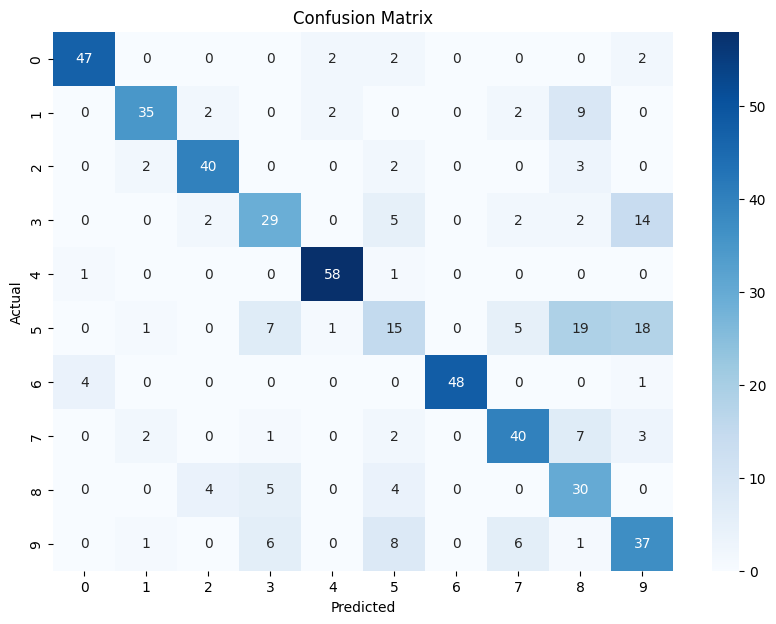

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from scipy import sparse

# Step 1: Load Dataset (using digits dataset as a placeholder)
def load_data():
    # Load digits dataset as an example
    digits = load_digits()
    X = digits.data
    y = digits.target
    return X, y

# Step 2: Split data into training and test sets
def split_data(X, y, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

# Step 3: Apply Standard Scaling
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Step 4: Apply PCA for dimensionality reduction
def apply_pca(X_train_scaled, X_test_scaled, n_components=3):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Convert to sparse matrix and then back to dense format
    X_train_pca = sparse.csr_matrix(X_train_pca)
    X_test_pca = sparse.csr_matrix(X_test_pca)
    
    # Convert to dense format
    X_train_pca = X_train_pca.toarray()
    X_test_pca = X_test_pca.toarray()
    
    return X_train_pca, X_test_pca

# Step 5: Train the model and make predictions
def train_and_evaluate(X_train, X_test, y_train, y_test):
    # Initialize the HistGradientBoostingClassifier
    hg_clf = HistGradientBoostingClassifier(max_iter=20, random_state=0)
    
    # Train the model
    hg_clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = hg_clf.predict(X_test)
    
    # Evaluate accuracy
    accuracy = hg_clf.score(X_test, y_test)
    print(f"Accuracy: {accuracy:.4f}")
    
    return y_pred

# Step 6: Plot Confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Step 7: Main function to orchestrate the process
def main():
    # Load data
    X, y = load_data()
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Scale the data
    X_train_scaled, X_test_scaled = scale_data(X_train, X_test)
    
    # Apply PCA for dimensionality reduction
    X_train_pca, X_test_pca = apply_pca(X_train_scaled, X_test_scaled, n_components=3)
    
    # Train and evaluate the model
    y_pred = train_and_evaluate(X_train_pca, X_test_pca, y_train, y_test)
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred)

# Run the main function
if __name__ == "__main__":
    main()



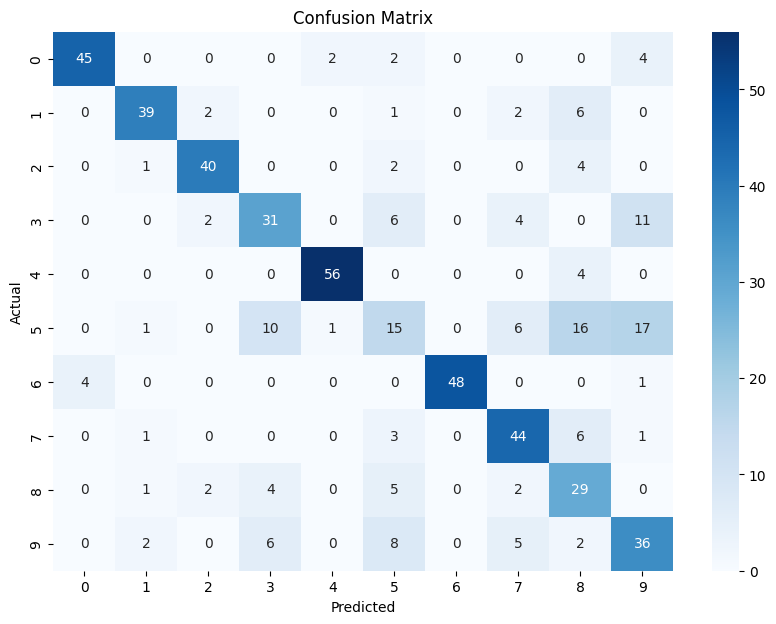

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        53
           1       0.87      0.78      0.82        50
           2       0.87      0.85      0.86        47
           3       0.61      0.57      0.59        54
           4       0.95      0.93      0.94        60
           5       0.36      0.23      0.28        66
           6       1.00      0.91      0.95        53
           7       0.70      0.80      0.75        55
           8       0.43      0.67      0.53        43
           9       0.51      0.61      0.56        59

    accuracy                           0.71       540
   macro avg       0.72      0.72      0.72       540
weighted avg       0.72      0.71      0.71       540

Precision: 0.72
Recall: 0.71
F1-Score: 0.71


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Step 1: Load your dataset (replace this with your dataset loading code)
# For illustration, we're using a dataset from sklearn (e.g., digits dataset)
from sklearn.datasets import load_digits
data = load_digits()
X = data.data
y = data.target

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Apply PCA for dimensionality reduction
def apply_pca(X_train, X_test, n_components=3):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

X_train_pca, X_test_pca = apply_pca(X_train_scaled, X_test_scaled, n_components=3)

# Step 5: Train the Gradient Boosting model
def train_and_evaluate(X_train, X_test, y_train, y_test):
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
    gb_clf.fit(X_train, y_train)
    y_pred = gb_clf.predict(X_test)
    return y_pred, gb_clf

# Train and get predictions
y_pred, model = train_and_evaluate(X_train_pca, X_test_pca, y_train, y_test)

# Step 6: Confusion Matrix Plot
def plot_confusion_matrix(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(y_test, y_pred)

# Step 7: Additional Metrics - Precision, Recall, and F1-Score
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Alternatively, manually extract and print Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted average for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


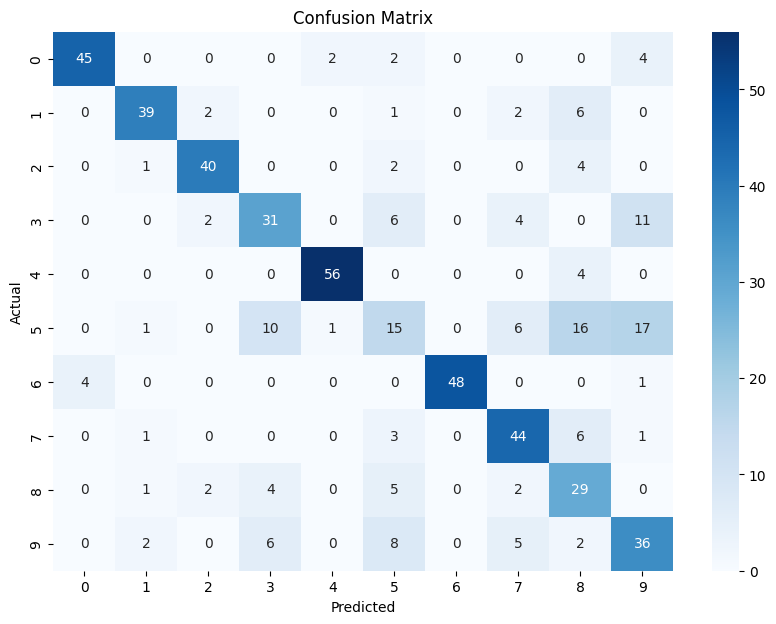

Classification Report:
{'0': {'precision': 0.9183673469387755, 'recall': 0.8490566037735849, 'f1-score': 0.8823529411764706, 'support': 53.0}, '1': {'precision': 0.8666666666666667, 'recall': 0.78, 'f1-score': 0.8210526315789474, 'support': 50.0}, '2': {'precision': 0.8695652173913043, 'recall': 0.851063829787234, 'f1-score': 0.8602150537634409, 'support': 47.0}, '3': {'precision': 0.6078431372549019, 'recall': 0.5740740740740741, 'f1-score': 0.5904761904761905, 'support': 54.0}, '4': {'precision': 0.9491525423728814, 'recall': 0.9333333333333333, 'f1-score': 0.9411764705882353, 'support': 60.0}, '5': {'precision': 0.35714285714285715, 'recall': 0.22727272727272727, 'f1-score': 0.2777777777777778, 'support': 66.0}, '6': {'precision': 1.0, 'recall': 0.9056603773584906, 'f1-score': 0.9504950495049505, 'support': 53.0}, '7': {'precision': 0.6984126984126984, 'recall': 0.8, 'f1-score': 0.7457627118644068, 'support': 55.0}, '8': {'precision': 0.43283582089552236, 'recall': 0.674418604651162

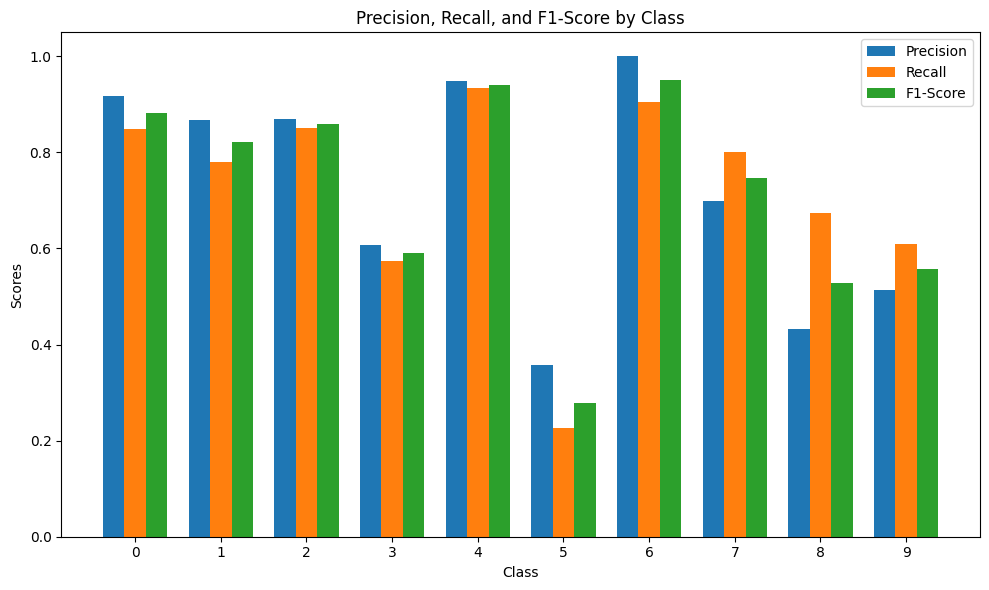

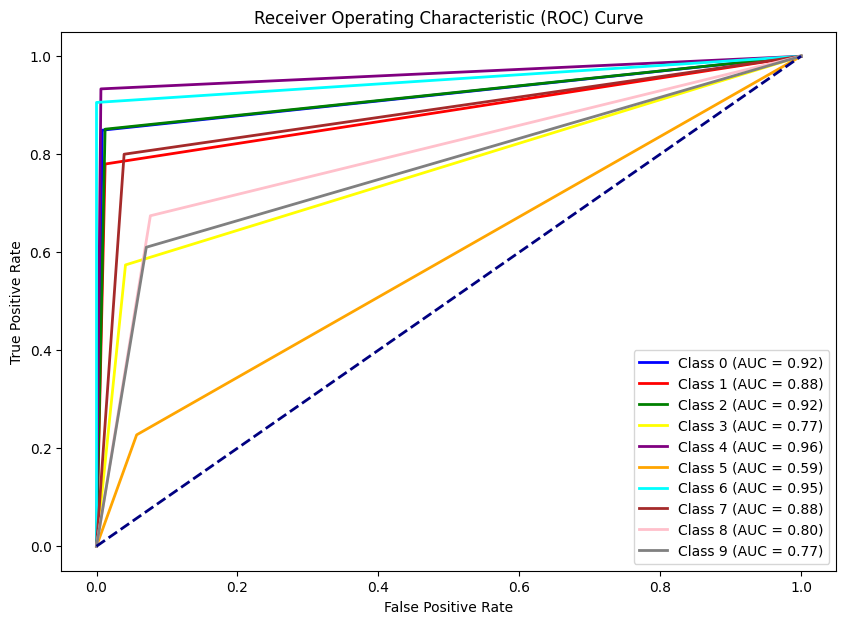

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import numpy as np

# Assuming y_test and y_pred are already defined

# Step 1: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 2: Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:")
print(report)

# Step 3: Precision, Recall, F1-Score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Plotting Precision, Recall, and F1-Score for each class
labels = np.unique(y_test)
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.25
rects1 = ax.bar(x - width, precision, width, label="Precision")
rects2 = ax.bar(x, recall, width, label="Recall")
rects3 = ax.bar(x + width, f1, width, label="F1-Score")

ax.set_xlabel("Class")
ax.set_ylabel("Scores")
ax.set_title("Precision, Recall, and F1-Score by Class")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Step 4: ROC Curve (for each class, if multiclass)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_test))

# One-vs-rest ROC
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 7))
colors = ['blue', 'red', 'green', 'yellow', 'purple', 'orange', 'cyan', 'brown', 'pink', 'gray']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the model
gb_clf = GradientBoostingClassifier(random_state=0)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model to predict
best_gb_clf = grid_search.best_estimator_
y_pred = best_gb_clf.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       1.00      1.00      1.00        50
           2       1.00      0.98      0.99        47
           3       1.00      0.96      0.98        54
           4       0.98      1.00      0.99        60
           5       0.98      0.97      0.98        66
           6       0.98      0.98      0.98        53
           7       0.96      0.98      0.97        55
           8       0.91      1.00      0.96        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [21]:
from sklearn.model_selection import cross_val_score

# Cross-validation on the GradientBoostingClassifier
cv_scores = cross_val_score(gb_clf, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean Cross-validation accuracy: {cv_scores.mean():.4f}")


Cross-validation scores: [0.94444444 0.91269841 0.97609562 0.94422311 0.96414343]
Mean Cross-validation accuracy: 0.9483


In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.94      0.98      0.96        50
           2       1.00      0.98      0.99        47
           3       1.00      0.96      0.98        54
           4       0.95      1.00      0.98        60
           5       0.94      0.94      0.94        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.95      0.95      0.95        43
           9       0.95      0.95      0.95        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



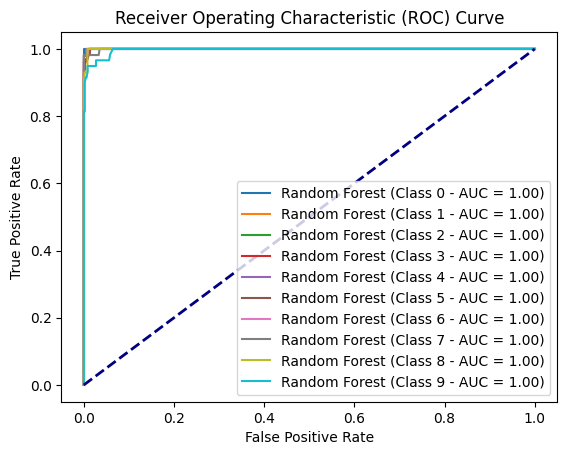

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels (for multiclass ROC)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Function to plot ROC curve for each class
def plot_roc_curve(fpr, tpr, model_name, class_id):
    plt.plot(fpr, tpr, label=f'{model_name} (Class {class_id} - AUC = {auc(fpr, tpr):.2f})')

# Get ROC curve for Random Forest Classifier (One-vs-Rest approach)
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr_rf, tpr_rf, _ = roc_curve(y_test_bin[:, i], rf_clf.predict_proba(X_test)[:, i])
    plot_roc_curve(fpr_rf, tpr_rf, 'Random Forest', i)

# Add a diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
